<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/Lewis_ANN_multilayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

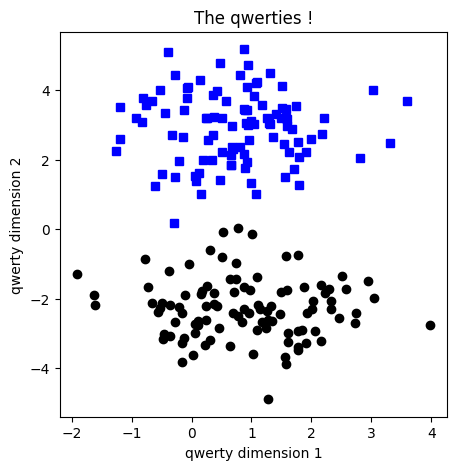

In [68]:
# Create Data
#Create the data

nPerClust = 100
blur = 1  #this is my standard diviation - shows spreadout the data value (individual data points) is from its cluster

#x , y center quartenants for the data cloud
# so A will be center with x= 1, and y = 3
# and B will be center with x=1, and y = -2
#this changes how the qwerties ,blue boxes and black sqaure are plotted on graph - vertical juxtaposition
A = [1,3]
B = [1,-2]

#Generate Data
#add random numbers to each element value in  vector A and B
a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+ np.random.randn(nPerClust)*blur ]

#Creating the Category labels -dummy coded category labels - coverting to numbers
#one half of data is qwerty type ZEROS and the other half is qwerty type ONES
#this creates the categories
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

#here I'm stacking each vector into one data matrix (array) - concatenate into a matrix using T - Transpose
data_np = np.hstack((a,b)).T

#Convert to a pytorch tensor - a vector in pytorch
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The qwerties !')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Functions that build and train the model

In [69]:
#Build -Create the Model
# Points
# (Always linear to --> non-linear pair combination)
# Linear always pairs with ReLU(or some type of activation function) activation function
# ReLU function is inside of the model
# Sigmoid function is outside the model - the final output layer - prediction
def createANNmodel(learningRate):

  #model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2,16),  # input layer  the number 2 respresents the x and y coorddinates and 16 units(output) in the input layer - my choice - much match next linear function input
      nn.ReLU(),        # activation unit
      nn.Linear(16,1),  # hiddern layer
      nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit   - only one output value so the output for this linear function is set to 1 (right side) - raw output passes through the Sigmoid() here
      nn.Sigmoid(),   # final activation unit , probrablity that input belongs to category 1 or category 2 blue or black  - Sigmoid function is a non-negative function every value is greater than zero
  )
                      # if liner output  to --> linear input are not the same value - size the following error will accur
                      #example:   nn.=Linear(2, 16) and the next nn.Linear(15,1) -
                      # the two inner value 16 and 15 of vectors must be the same
                      # 200 is the number of samples - x,y coordinates
                      # RuntimeError: mat1 and mat2 shapes cannot be multiplied (200x16 and 15x1)
  # loss funciton
  lossfun = nn.BCELoss()  # however, it is better to use BCEWithLogitsLoss() method

  # optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  #model output
  return ANNclassify,lossfun,optimizer



In [70]:
# a function that trains the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):

  #initialize losses
  losses = torch.zeros(numepochs)

  #loop over epochs
  for epochi in range(numepochs):

    #forward pass
    yHat = ANNmodel(data)

    #compute the loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    #backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  #final forward pass
  predictions = ANNmodel(data)

  #compute the predictions and report accuracy
  # NOTE:  Wasn't this ">0" previously ? ! - reason - Im using the actual Sigmoid function - so I set its center .5 ? unlike if I would have
  # used the BCEWeightLogitsLoss() function, it calculates in the Sigmoid center .5 and therefore in previous coding exercise I used .0 in comparison
  totalacc = 100*torch.mean(((predictions>.5) == labels).float())   #.5 is the decision boundary


  return losses,predictions,totalacc






In [83]:
#a vector of numbers , has gradient info attached so use detach() to isolate the numbers
# model did well in run, y axis is the probabili5y that the sample comes from Cat1 and Cat2
# great performancde in a Categorization model, want to see the values are at the floor or at the ceiling
#therefore the model predicted accurately with the exception of a few samples in the middle - thses could be the data points that are close to the center, therfore harder to categorize
# plt.plot(predictions.detach(),'o')

# predictions > .05 # will display True or False

# labels  # display labels are zeros and ones , checking if the Falses from the (predictions>.05) are equal to the zeros in the label

# Ones are accurate predictions and Zeros are inaccurate predictions
# (predictions>.05) == labels
        #display a boolean vector of accuracy for each individual element
        #so if True is displayed the prediction value is zero and matches the labels value of zero
        #this run shows one False - or one inaccurate prediction where the model did not guess it correclty

# to get the average
# torch.mean(((predictions>.05)==labels).float())

# to get the percent
# 100*torch.mean(((predictions>.05)==labels).float())

tensor(99.5000)

# Test the new code by running it once

Final accuracy: 99.5%


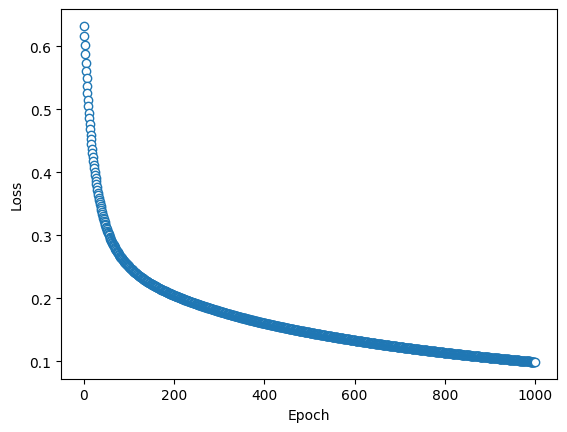

In [74]:
from functools import total_ordering
#create everything here
ANNclassify,lossfun,optimizer = createANNmodel(.01)

#Run it
losses,predictions,totalacc = trainTheModel(ANNclassify)

#report accuracy
print('Final accuracy: %g%%' %totalacc)

#Show the losses
plt.plot(losses.detach(), 'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#The Final accuracy was 98.5 which means the model categorized every single sample ( 200 (x,y) coordinates) correctLY with the exception of 1.5 samples
#review the graph above to see which samples were not categorized correclty

# Now for the real test (varying learning rates)

In [75]:
# learning rates
#  Return evenly spaced numbers over a specified interval.
# linspace(start,stop,num)
#Returns `num` evenly spaced samples, calculated over the
#    interval [`start`, `stop`].
#learningrates range from .001 through .1 in 50 linear steps
learningrates = np.linspace(.001,.1,50)

# intilialize
accByLR = []
allLosses = np.zeros((len(learningrates),numepochs))

# the loop
for i, lr in enumerate(learningrates):

  #create and run the model
  ANNclassify,lossfun,optimizer = createANNmodel(lr)
  losses,predictions,totalacc = trainTheModel(ANNclassify)

  #store the results
  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()



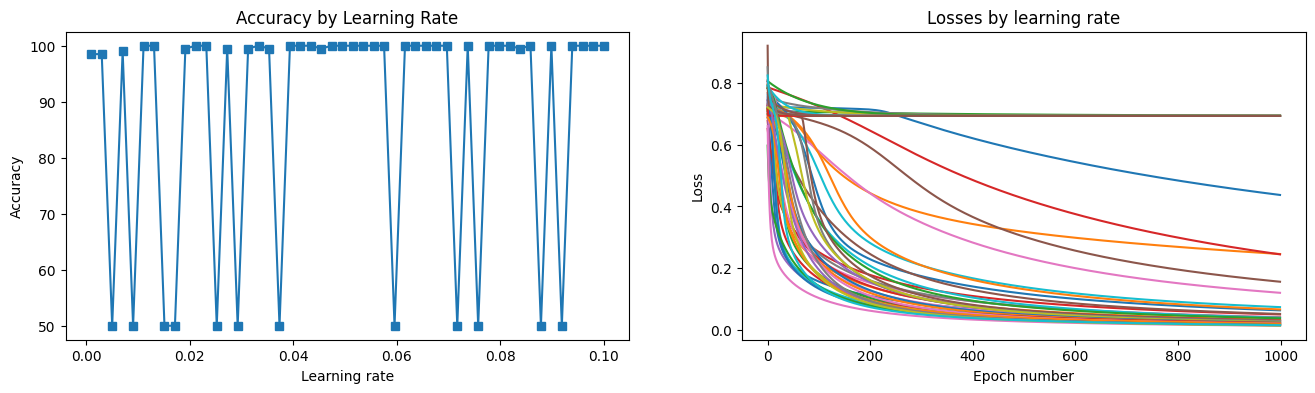

In [76]:
#plot the results

fig,ax = plt.subplots(1,2,figsize=(16,4))

#First Graph ax[0]
ax[0].plot(learningrates,accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')

#Second graph ax[1]
ax[1].plot(allLosses.T) # all losses tranposed
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

# Graph 1 - Accuracy by Learning Rate Here the model does really well or really poorly and nothing in between (like Accuracy at 70 or 80)

#Graph 2 - Losses by learning rate - the loss funciton show the loss goes towards zero or the loss remains really hig like between 0.6 and 0.8

In [77]:
#the result shows that the model shows three quarters of the time the model is accurate at ~0.76 and a quarter not correct
sum(torch.tensor(accByLR)> 70)/len(accByLR)

tensor(0.7600)